In [10]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
'''
para py
import os, sys
dir = os.path.dirname
src_path = dir(dir(__file__))
print("")
#print(src_path)
sys.path.append(src_path)
from utils.c import function_c
'''

'\npara py\nimport os, sys\ndir = os.path.dirname\nsrc_path = dir(dir(__file__))\nprint("")\n#print(src_path)\nsys.path.append(src_path)\nfrom utils.c import function_c\n'

In [12]:
    dir = os.path.dirname
    csv_path = dir(dir(os.getcwd()))
    sys.path.append(csv_path)
    
    from data import ready

In [13]:
df = pd.read_csv("homicides_data.csv")
df

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
0,197603001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,NaN,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
1,197604001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,NaN,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Girlfriend,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
2,197606001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,NaN,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Other,NaN,0,0,30180.0,"Anchorage, AK"
3,197606002AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,NaN,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
4,197607001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,NaN,...,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804746,201511001WYDI050,"Fremont, WY",WYDI050,Wyoming,Wind River Agency,Tribal,FBI,Yes,2015,NaN,...,American Indian or Alaskan Native,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Common-law husband,Other - not specified,NaN,0,0,32316.0,Rural Wyoming
804747,201707001WYDI050,"Fremont, WY",WYDI050,Wyoming,Wind River Agency,Tribal,FBI,Yes,2017,NaN,...,American Indian or Alaskan Native,Not of Hispanic origin,Knife or cutting instrument,Friend,Brawl due to influence of alcohol,NaN,0,0,102418.0,Rural Wyoming
804748,201711001WYDI050,"Fremont, WY",WYDI050,Wyoming,Wind River Agency,Tribal,FBI,Yes,2017,NaN,...,American Indian or Alaskan Native,Not of Hispanic origin,"Blunt object - hammer, club, etc",Acquaintance,Brawl due to influence of alcohol,NaN,0,0,102418.0,Rural Wyoming
804749,201808001WYDI050,"Fremont, WY",WYDI050,Wyoming,Wind River Agency,Tribal,FBI,No,2018,NaN,...,Unknown,Unknown or not reported,Shotgun,Other - known to victim,Narcotic drug laws,NaN,0,0,93019.0,Rural Wyoming


In [14]:
df.columns

Index(['ID', 'CNTYFIPS', 'Ori', 'State', 'Agency', 'Agentype', 'Source',
       'Solved', 'Year', 'StateName', 'Month', 'Incident', 'ActionType',
       'Homicide', 'Situation', 'VicAge', 'VicSex', 'VicRace', 'VicEthnic',
       'OffAge', 'OffSex', 'OffRace', 'OffEthnic', 'Weapon', 'Relationship',
       'Circumstance', 'Subcircum', 'VicCount', 'OffCount', 'FileDate', 'MSA'],
      dtype='object')

In [15]:
df = df.drop(['StateName', 'Subcircum'], axis =1)

In [18]:
df.columns


Index(['ID', 'CNTYFIPS', 'Ori', 'State', 'Agency', 'Agentype', 'Source',
       'Solved', 'Year', 'Month', 'Incident', 'ActionType', 'Homicide',
       'Situation', 'VicAge', 'VicSex', 'VicRace', 'VicEthnic', 'OffAge',
       'OffSex', 'OffRace', 'OffEthnic', 'Weapon', 'Relationship',
       'Circumstance', 'VicCount', 'OffCount', 'FileDate', 'MSA'],
      dtype='object')

In [20]:
curious = df[['OffSex','Weapon', 'Circumstance']]
curious

,OffSex,Weapon,Circumstance
0,Male,"Handgun - pistol, revolver, etc",Other arguments
1,Male,"Handgun - pistol, revolver, etc",Other arguments
2,Male,"Handgun - pistol, revolver, etc",Other
3,Male,"Handgun - pistol, revolver, etc",Other arguments
4,Female,Knife or cutting instrument,Other arguments
...,...,...,...
804746,Male,"Handgun - pistol, revolver, etc",Other - not specified
804747,Male,Knife or cutting instrument,Brawl due to influence of alcohol
804748,Male,"Blunt object - hammer, club, etc",Brawl due to influence of alcohol
804749,Unknown,Shotgun,Narcotic drug laws


<AxesSubplot:>

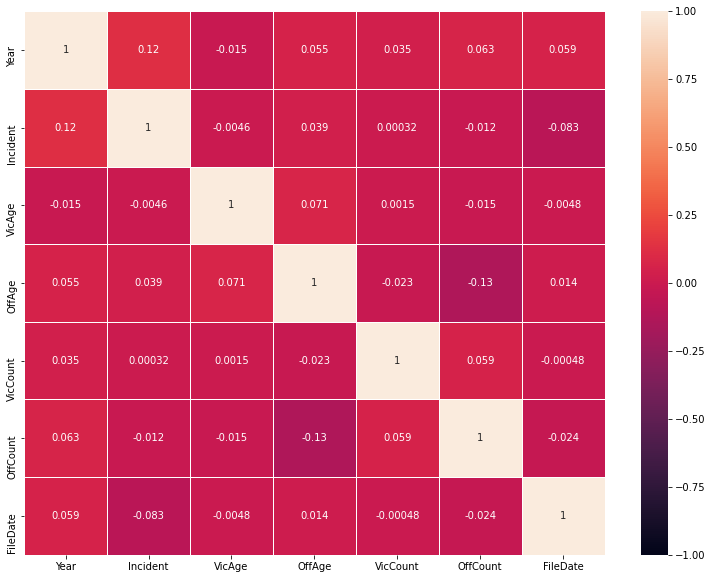

In [8]:
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(df.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)